<a href="https://colab.research.google.com/github/thishaniwijayaratne/Radar_Assignments/blob/master/170698J_Radar_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
###### Testing text.

# Methodology

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import cv2

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
# # Initializing Parameters
# # Units stated
raw_sampling_rate = 1080 * 1000 # Hz
N_range_slots = 30  

pulse_repetition_frequency = 1800  # Hz

horizontal_beam_width = 2
radar_rotation_speed = 12 # RPM

Ts = 1/(N_range_slots*pulse_repetition_frequency) #Ts = 1/N*fr
fs = 1/Ts 
sampling_factor = raw_sampling_rate/fs  # For downsampling

N_pulses = int( 18000 * (pulse_repetition_frequency / raw_sampling_rate) )
N_samples_per_pulse = int( 18000/N_pulses )

sampling_indexs = np.linspace(1,18000, num = int(18000/sampling_factor)).astype(int)

pulse_indexes = np.linspace(18000/N_pulses,18000,N_pulses).astype(int)
# bin_indexes = 

# print(sampling_indexs)
# print(sampling_indexs)

In [32]:
# Importing csv files from Google Drive

path1 = '/content/drive/MyDrive/Sem 8/Radar/raw_data1.csv'
path2 = '/content/drive/MyDrive/Sem 8/Radar/raw_data2.csv'
path3 = '/content/drive/MyDrive/Sem 8/Radar/raw_data3.csv'

df1 = pd.read_csv(path1,header=None)
df2 = pd.read_csv(path2,header=None)
df3 = pd.read_csv(path3,header=None)

# df1.head()
# df2.head()
# df3.head()

data1 = np.array( list(df1[0]) )
data2 = np.array( list(df2[0]) )
data3 = np.array( list(df3[0]) )

# Implementing Post detection integration
Integrated_Data_Matrix = np.add(data1,(np.add(data2, data3)))


In [33]:
# Performing Down sampling

integrated_down_sampled = np.zeros((900))
# down_sampled_1 = np.zeros((900))
# down_sampled_2 = np.zeros((900))
# down_sampled_3 = np.zeros((900))

for sample in range (0,(sampling_indexs.size-1)):
  integrated_down_sampled[sample] = Integrated_Data_Matrix[sampling_indexs[sample]]
  # down_sampled_1[sample] = data1[sampling_indexs[sample]]
  # down_sampled_2[sample] = data2[sampling_indexs[sample]]
  # down_sampled_3[sample] = data3[sampling_indexs[sample]]

# print(down_sampled_1.shape)

In [34]:
# Creating the Data Matrix
Integrated_down_sampled_data_matrix = np.reshape(integrated_down_sampled, (30, 30))
# Data_Matrix_1 = np.reshape(down_sampled_1, (30, 30))
# Data_Matrix_2 = np.reshape(down_sampled_2, (30, 30))
# Data_Matrix_3 = np.reshape(down_sampled_3, (30, 30))

# Implementing Post detection integration
# Integrated_Data_Matrix = np.add(Data_Matrix_1,(np.add(Data_Matrix_2, Data_Matrix_3)))

# Implementing Threshold Detection

# Defininf Parameters
window_size = 21
guard_band = 4
standard_deviation_of_noise = 1
k = 2.5

Binary_Matrix = np.zeros((30,30))

for bin in range(0,N_range_slots):
  for pulse in range(0,N_pulses):

    # V_avg_2 = np.sum(
    
    V_avg = (np.sum(Integrated_down_sampled_data_matrix[bin][(pulse - guard_band): (pulse - window_size)])  +  np.sum(Integrated_down_sampled_data_matrix[bin][(pulse + guard_band): (pulse + window_size)])) / (2 * (window_size - guard_band))
    V_th = V_avg + (k * standard_deviation_of_noise)
    if (Integrated_down_sampled_data_matrix[bin][pulse] >= V_th):
      Binary_Matrix[bin][pulse] = 1
    else:
      Binary_Matrix[bin][pulse] = 0





    # if (bin < window_size):
    #   V_avg = (np.sum(Integrated_Data_Matrix[bin][(pulse + guard_band): (pulse + window_size)])) / (window_size - guard_band)
    #   V_th = V_avg + (k * standard_deviation_of_noise)
      
    #   if (Integrated_Data_Matrix[bin][pulse] >= V_th):
    #     Binary_Matrix[bin][pulse] = 1
    #   else:
    #     Binary_Matrix[bin][pulse] = 0

    # elif (bin > (N_range_slots-window_size-1)):
    #   V_avg = (np.sum(Integrated_Data_Matrix[bin][(pulse - guard_band): (pulse - window_size)])) / (window_size - guard_band)
    #   V_th = V_avg + (k * standard_deviation_of_noise)
    #   if (Integrated_Data_Matrix[bin][pulse] >= V_th):
    #     Binary_Matrix[bin][pulse] = 1
    #   else:
    #     Binary_Matrix[bin][pulse] = 0
    
    # else:
    #   V_avg = (np.sum(Integrated_Data_Matrix[bin][(pulse - guard_band): (pulse - window_size)])  +  np.sum(Integrated_Data_Matrix[bin][(pulse + guard_band): (pulse + window_size)])) / (2 * (window_size - guard_band))
    #   V_th = V_avg + (k * standard_deviation_of_noise)
    #   if (Integrated_Data_Matrix[bin][pulse] >= V_th):
    #     Binary_Matrix[bin][pulse] = 1
    #   else:
    #     Binary_Matrix[bin][pulse] = 0


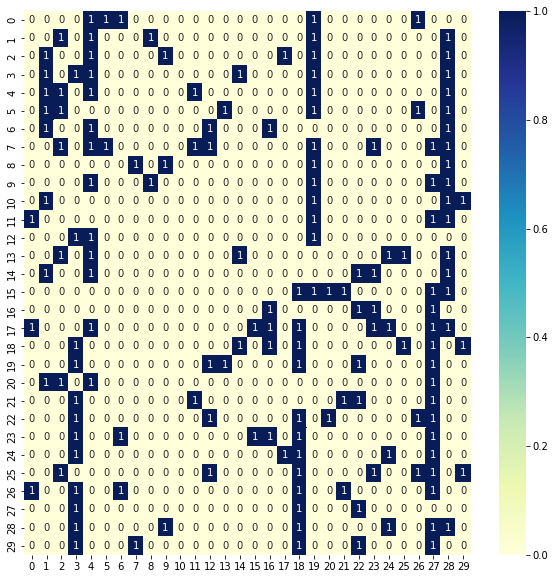

In [35]:
def Get_Heat_Map(Data_Matrix):
    fig, ax = plt.subplots(figsize=(10,10))
    # ax = sns.heatmap(Data_Matrix,cmap="YlGnBu")
    ax = sns.heatmap(Data_Matrix,annot=True,cmap="YlGnBu")
    plt.show()

Get_Heat_Map(Binary_Matrix)

If the number of pulses having '1' in a particular bin is higher than 50% of the bins, it can be decided that there is an object in that particular bin.

In [8]:
# Removing Targets from the matrix
Threshold = N_range_slots * 0.5
count_of_1s = np.zeros((30,30))

for bin in range(0,N_range_slots):
  for pulse in range(0,N_pulses):


Noise filtered data matrix:


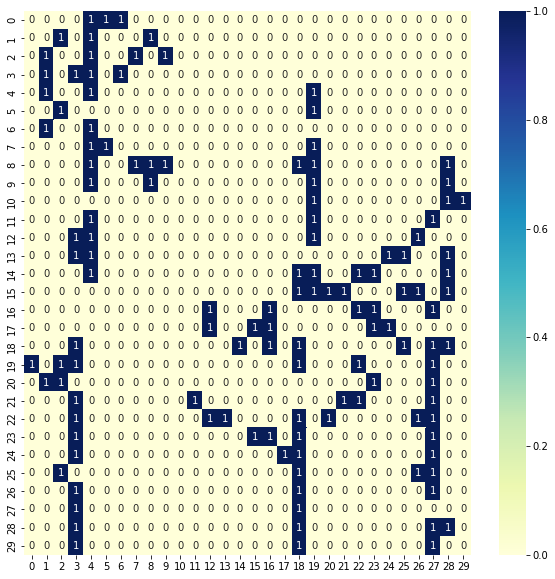

In [9]:
#Removing noise 
def get_noiseremoved(j,data):
    for i in range(1,j+1):  #running multiple noice filters
        row=data.shape[0]
        col=data.shape[1]
        d=np.zeros((row+i*2,col+i*2))
        d[i:row+i,i:col+i]=data
        for l in range(i,row+i):
            for k in range(i,col+i):
                d[l,k]=d[l,k]*int(sum(sum(d[l-i:l+i+1,k-i:k+i+1]))>i)
        data=(d[i:row+i,i:col+i])
    return(data)

filtered_matrix=get_noiseremoved(30,get_noiseremoved(30,Binary_Matrix)) #filtering noise
"for low noise senarios skip this noise filtering and uncomment below line"
#filtered_matrix=targetremoved_matrix  

#Visualizing noise filtered matrix
print("Noise filtered data matrix:")
Get_Heat_Map(filtered_matrix)

In [ ]:
d1 = np.array([[1,2,3],
               [4,5,6]])

d2 = np.array([[1,1,1],
               [1,1,1]])

d3 = np.array([[2,2,2],
               [2,2,2]])

d4 = np.add(d1,d2)
np.sum(d1[1][0:2])

9